In [75]:
import numpy as np 
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt

In [76]:
sc.settings.verbosity = 3

df = pd.read_csv("../7_ovary.tsv",sep="\t",header=None)
df.set_index(df.columns[0],inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,7540,7541,7542,7543,7544,7545,7546,7547,7548,7549
0,,,,,,,,,,,,,,,,,,,,,
128up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14-3-3epsilon,1,0,2,2,1,1,2,0,3,0,...,0,4,1,0,0,0,1,3,4,0
14-3-3zeta,1,2,1,2,1,0,3,0,3,8,...,2,5,3,3,1,1,0,2,8,6
140up,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18SrRNA-Psi:CR41602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zormin,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zpg,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
zuc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_transp = df.T
dfsc = sc.AnnData(df_transp)
dfsc

/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 7549 × 11944

normalizing counts per cell
    finished (0:00:01)


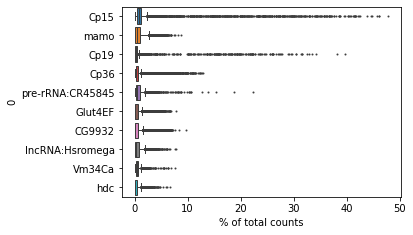

In [78]:
sc.pl.highest_expr_genes(dfsc, n_top=10)


In [79]:
dfsc.var['mt'] = dfsc.var_names.str.startswith('mt:') 
sc.pp.calculate_qc_metrics(dfsc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

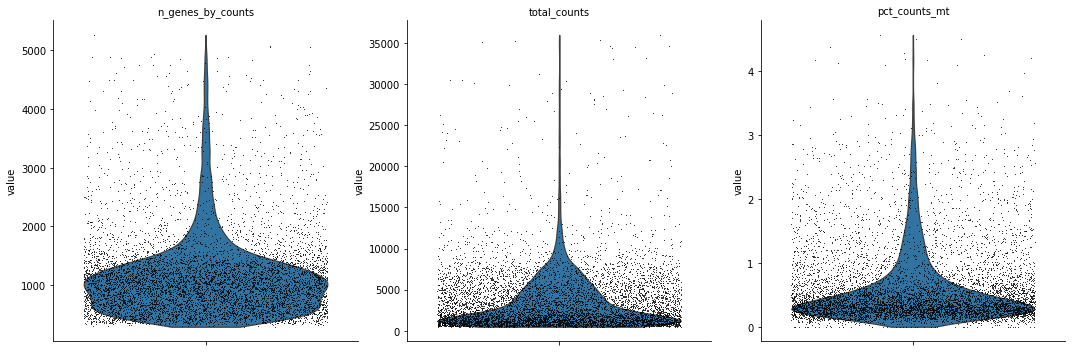

In [80]:
sc.pl.violin(dfsc, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

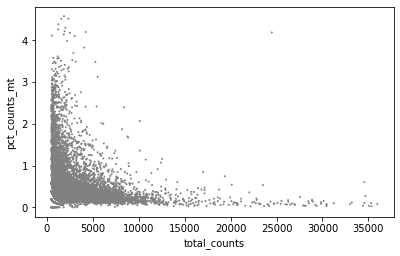

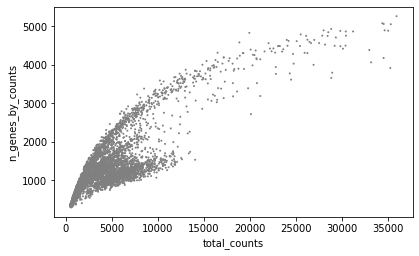

In [81]:
sc.pl.scatter(dfsc, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(dfsc, x='total_counts', y='n_genes_by_counts')

/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


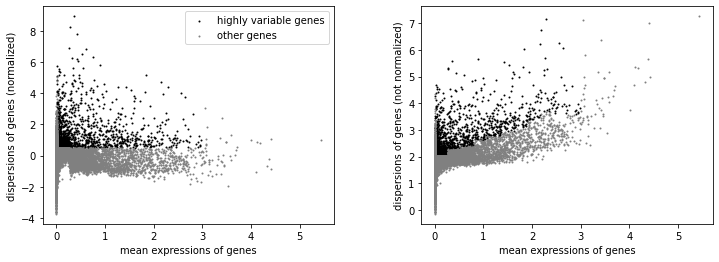

In [83]:
dfsc = dfsc[dfsc.obs.n_genes_by_counts < 2500, :]
dfsc = dfsc[dfsc.obs.pct_counts_mt < 5, :]

sc.pp.normalize_total(dfsc, target_sum=1e4)

sc.pp.log1p(dfsc)

sc.pp.highly_variable_genes(dfsc, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.pl.highly_variable_genes(dfsc)

In [85]:
dfsc.raw = dfsc

In [86]:
sc.pp.filter_cells(dfsc, min_genes=200)
sc.pp.filter_genes(dfsc, min_cells=3)

dfsc = dfsc[:, dfsc.var.highly_variable]
sc.pp.regress_out(dfsc, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(dfsc, max_value=10)

filtered out 5838 cells that have less than 200 genes expressed
filtered out 28 genes that are detected in less than 3 cells
regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:05)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


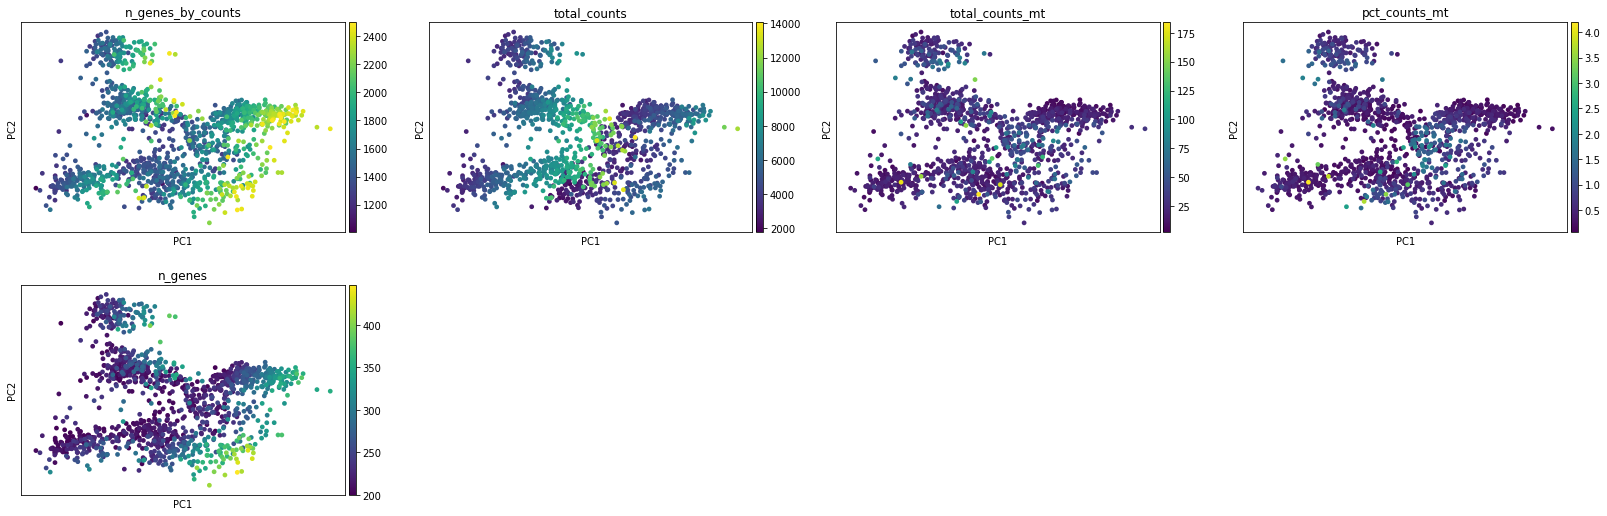

In [87]:
sc.tl.pca(dfsc, svd_solver='arpack')
sc.pl.pca(dfsc,color=['n_genes_by_counts','total_counts','total_counts_mt','pct_counts_mt','n_genes'])

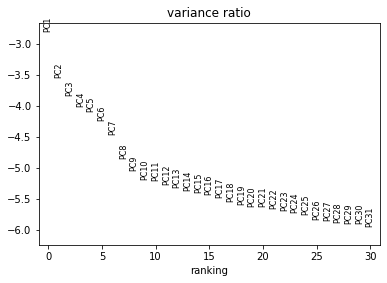

In [88]:
sc.pl.pca_variance_ratio(dfsc, log=True)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


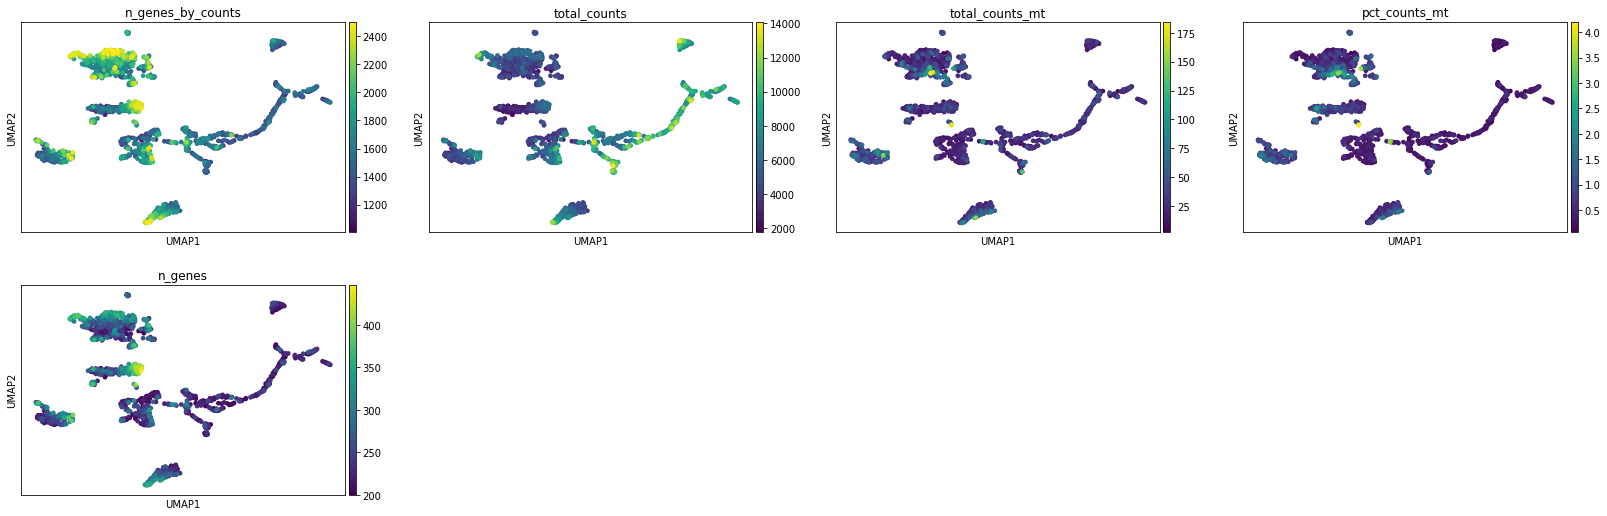

In [89]:
sc.pp.neighbors(dfsc, n_neighbors=10, n_pcs=40)

sc.tl.umap(dfsc)
sc.pl.umap(dfsc, color=['n_genes_by_counts','total_counts','total_counts_mt','pct_counts_mt','n_genes'])

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


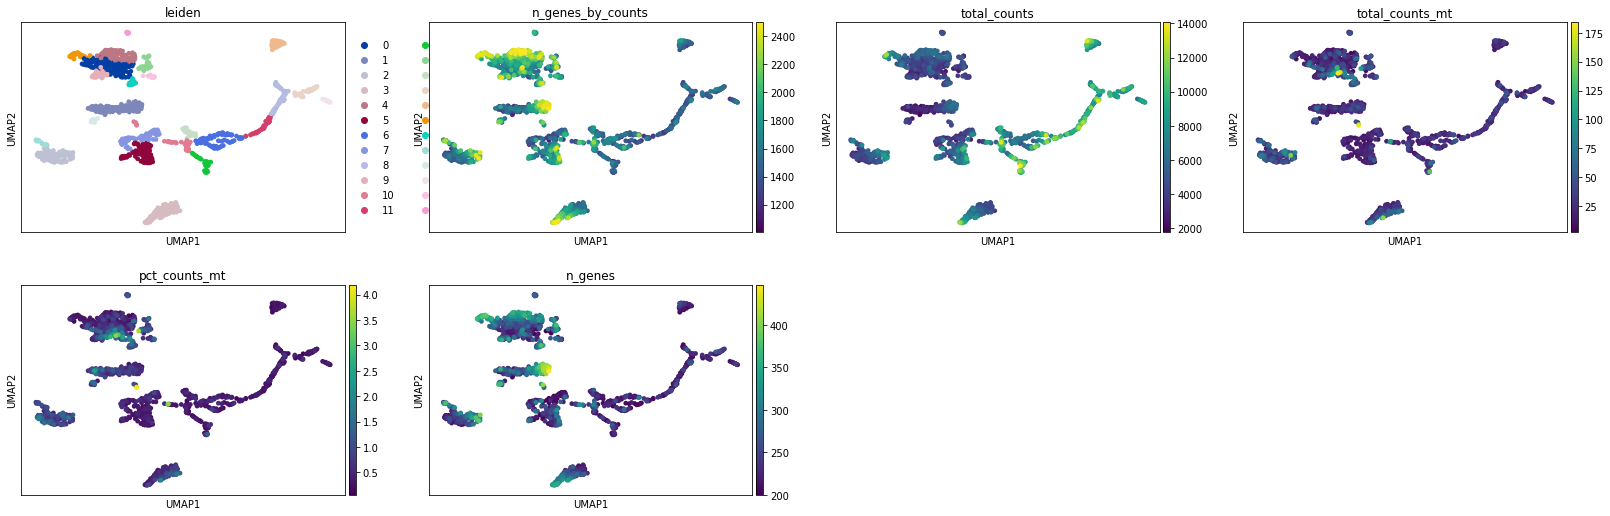

In [90]:
sc.tl.leiden(dfsc)
sc.pl.umap(dfsc, color=['leiden','n_genes_by_counts','total_counts','total_counts_mt','pct_counts_mt','n_genes'])